Kaggle Kernels & Notebooks:  
[Data Exploration Kernel](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)  


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from pandas_profiling import ProfileReport
%matplotlib inline

In [4]:
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', -1)

In [5]:
infile = '../data/transformed_data/train_preprocessed.csv'
outfile = '../data/transformed_data/train_features.csv'

In [6]:
df = pd.read_csv(infile)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

In [250]:
ProfileReport(df)

Number of variables,81
Number of observations,1460
Total Missing (%),0.0%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,35
Categorical,46
Date,0
Text (Unique),0
Rejected,0
Distinct count,753


#### Step 1: Basic Dimensionality Reduction (aka dropping) / Feature Creation

In [265]:
print('Basic Stats \n{}'.format(df['SalePrice'].describe()))
print('Skewness: {}'.format(df['SalePrice'].skew()))
print('Kurtosis: {}'.format(df['SalePrice'].kurt()))

Basic Stats 
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.  


Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.  

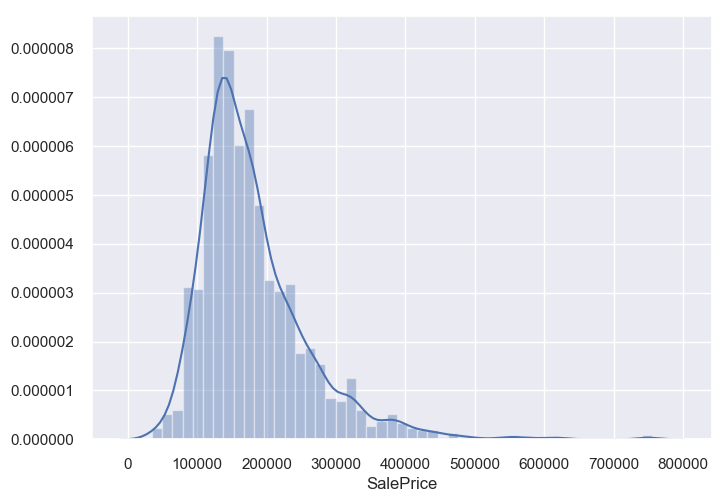

In [257]:
sns.distplot(df['SalePrice'])

Data is skewed to the left. Linear models don't like skewed data so we may have to transform this.

In [251]:
df = pd.read_csv(infile)

# Variable list groupings
garage_vars = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond']
porch_vars = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
condition_vars = ['Condition1', 'Condition2']
outside_vars = ['Street', 'Alley','PavedDrive']
land_vars = ['LandContour', 'LandSlope']
fireplace_vars = ['FireplaceQu', 'Fireplaces']
mas_vnr_vars = ['MasVnrType', 'MasVnrArea']
basement_vars = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2' ,'BsmtUnfSF', 'BsmtCond']
roof_vars = ['RoofMatl', 'RoofStyle']
misc_vars = ['MiscFeature', 'MiscVal']
house_utilities = ['HeatingQC', 'Electrical']
pool_vars = ['PoolArea','PoolQC']

# Keep just the GarageCars variable
df.drop(garage_vars, axis=1, inplace=True)

# Reducing the porch variables to has_porch
def has_porch(row):
    '''Determines if the property has a porch'''

    has_porch = 0
    
    for porch_var in porch_vars:
        if row[porch_var] > 0:
            has_porch = 1
            
    return has_porch
    
df['HasPorch'] = df.apply(has_porch, axis=1)   
df.drop(porch_vars, axis=1, inplace=True)

# Determining if the property was remodelled
def is_remodelled(row):
    '''Determines if the property has been remodelled'''
    if row['YearBuilt'] == row['YearRemodAdd']:
        return 1
    else:
        return 0

df['Remodelled'] = df.apply(is_remodelled, axis=1)
df.drop('YearRemodAdd', axis=1, inplace=True)

# Determining age of property at point of sale
def property_age(row):
    '''Determines the property age'''
    return int(row['YrSold'] - row['YearBuilt'])  

df['PropertyAge'] = df.apply(property_age, axis=1)
df.drop('YearBuilt', axis=1, inplace=True)

# Adding Basement bath variables to house bath variables
def full_bath(row):
    '''Adds basement full baths to full baths'''
    return row['FullBath'] + row['BsmtFullBath']

def half_bath(row):
    '''Adds basement half baths to half baths'''
    return row['HalfBath'] + row['BsmtHalfBath']  

df['FullBath'] = df.apply(full_bath, axis=1)
df.drop('BsmtFullBath', axis=1, inplace=True)
df['HalfBath'] = df.apply(half_bath, axis=1)
df.drop('BsmtHalfBath', axis=1, inplace=True)

# Adding a HasPool variable
def has_pool(row):
    '''Determines if the property has a pool'''
    if row['PoolArea'] > 0:
        return 1
    else:
        return 0
    
df['HasPool'] = df.apply(has_pool, axis=1)
df.drop(pool_vars, axis=1, inplace=True)

# Dropping Condition 1 and 2 for now
df.drop(condition_vars, axis=1, inplace=True)

# Dropping Street & Alley
df.drop(outside_vars, axis=1, inplace=True)

# Dropping the Land variables
df.drop(land_vars, axis=1, inplace=True)

# Dropping Exterior2nd and it's very similar to Exterior1st
df.drop('Exterior2nd', axis=1, inplace=True)

# Dropping Utilities because it's useless
df.drop('Utilities', axis=1, inplace=True)

# Dropping Fence
df.drop('Fence', axis=1, inplace=True)

# Drop LowQualFinSF
df.drop('LowQualFinSF', axis=1, inplace=True)

# Drop Heating
df.drop('Heating', axis=1, inplace=True)

# Dropping the Fireplace Variables
df.drop(fireplace_vars, axis=1, inplace=True)

# Dropping the MasVnr variables (pandas import error - may have to revisit)
df.drop(mas_vnr_vars, axis=1, inplace=True)

# Dropping unnecessary Basement Variables
df.drop(basement_vars, axis=1, inplace=True)

# Dropping the roof variables
df.drop(roof_vars, axis=1, inplace=True)

# Dropping the misc variables
df.drop(misc_vars, axis=1, inplace=True)

# Dropping the house utilities variables
df.drop(house_utilities, axis=1, inplace=True)

# Dropping the Condition variablea since they don't correlate
df.drop(['OverallCond','ExterCond'], axis=1, inplace=True)

# Dropping LotArea and LotFrontage since they don't correlate
df.drop(['LotArea', 'LotFrontage'], axis=1, inplace=True)

# Creating a HasDeck variable
def has_deck(row):
    if row['WoodDeckSF'] > 0:
        return 1
    else:
        return 0
    
df['HasDeck'] = df.apply(has_deck, axis=1)
df.drop('WoodDeckSF', axis=1, inplace=True)

# Creating a TotalArea variable
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea']

# Coding the quality variables
quality_codes = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1  
}

quality_vars = ['ExterQual', 'BsmtQual', 'KitchenQual']

for item in quality_vars:
    df[item].replace(quality_codes, inplace=True)


# Coding Neighbourhood

neighborhood_list = df['Neighborhood'].unique().tolist()
neighborhood_codes = {}

i=1
for item in neighborhood_list:
    neighborhood_codes[item] = i
    i+=1
    
df['Neighborhood'].replace(neighborhood_codes, inplace=True)

# Handling Total Area Outliers

def total_area_outliers(row):
    if row['TotalArea'] >= 10000:
        return 10000
    else:
        return row['TotalArea']

df['TotalArea'] = df.apply(total_area_outliers, axis=1)    
    
df.head(5)

,Id,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,Exterior1st,ExterQual,Foundation,BsmtQual,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageCars,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPorch,Remodelled,PropertyAge,HasPool,HasDeck,TotalArea
0,1,60,RL,Reg,Inside,1,1Fam,2Story,7,VinylSd,4,PConc,4,856,Y,856,854,1710,3,1,3,1,4,8,Typ,2,2,2008,WD,Normal,208500,1,1,5,0,0,4276
1,2,20,RL,Reg,FR2,2,1Fam,1Story,6,MetalSd,3,CBlock,4,1262,Y,1262,0,1262,2,1,3,1,3,6,Typ,2,5,2007,WD,Normal,181500,0,1,31,0,1,3786
2,3,60,RL,IR1,Inside,1,1Fam,2Story,7,VinylSd,4,PConc,4,920,Y,920,866,1786,3,1,3,1,4,6,Typ,2,9,2008,WD,Normal,223500,1,0,7,0,0,4492
3,4,70,RL,IR1,Corner,3,1Fam,2Story,7,Wd Sdng,3,BrkTil,3,756,Y,961,756,1717,2,0,3,1,4,7,Typ,3,2,2006,WD,Abnorml,140000,1,0,91,0,0,4190
4,5,60,RL,IR1,FR2,4,1Fam,2Story,8,VinylSd,4,PConc,4,1145,Y,1145,1053,2198,3,1,4,1,4,9,Typ,3,12,2008,WD,Normal,250000,1,1,8,0,1,5541


#### Step 2: Coding Variables

In [252]:
df_corr = df[['SalePrice', 'Foundation', 'Exterior1st', 'BsmtQual', 'TotRmsAbvGrd', 'TotalArea']].corr()
df_corr.round(1)

,SalePrice,TotRmsAbvGrd,TotalArea
SalePrice,1.0,0.5,0.8
TotRmsAbvGrd,0.5,1.0,0.8
TotalArea,0.8,0.8,1.0


#### Step 3: Viz

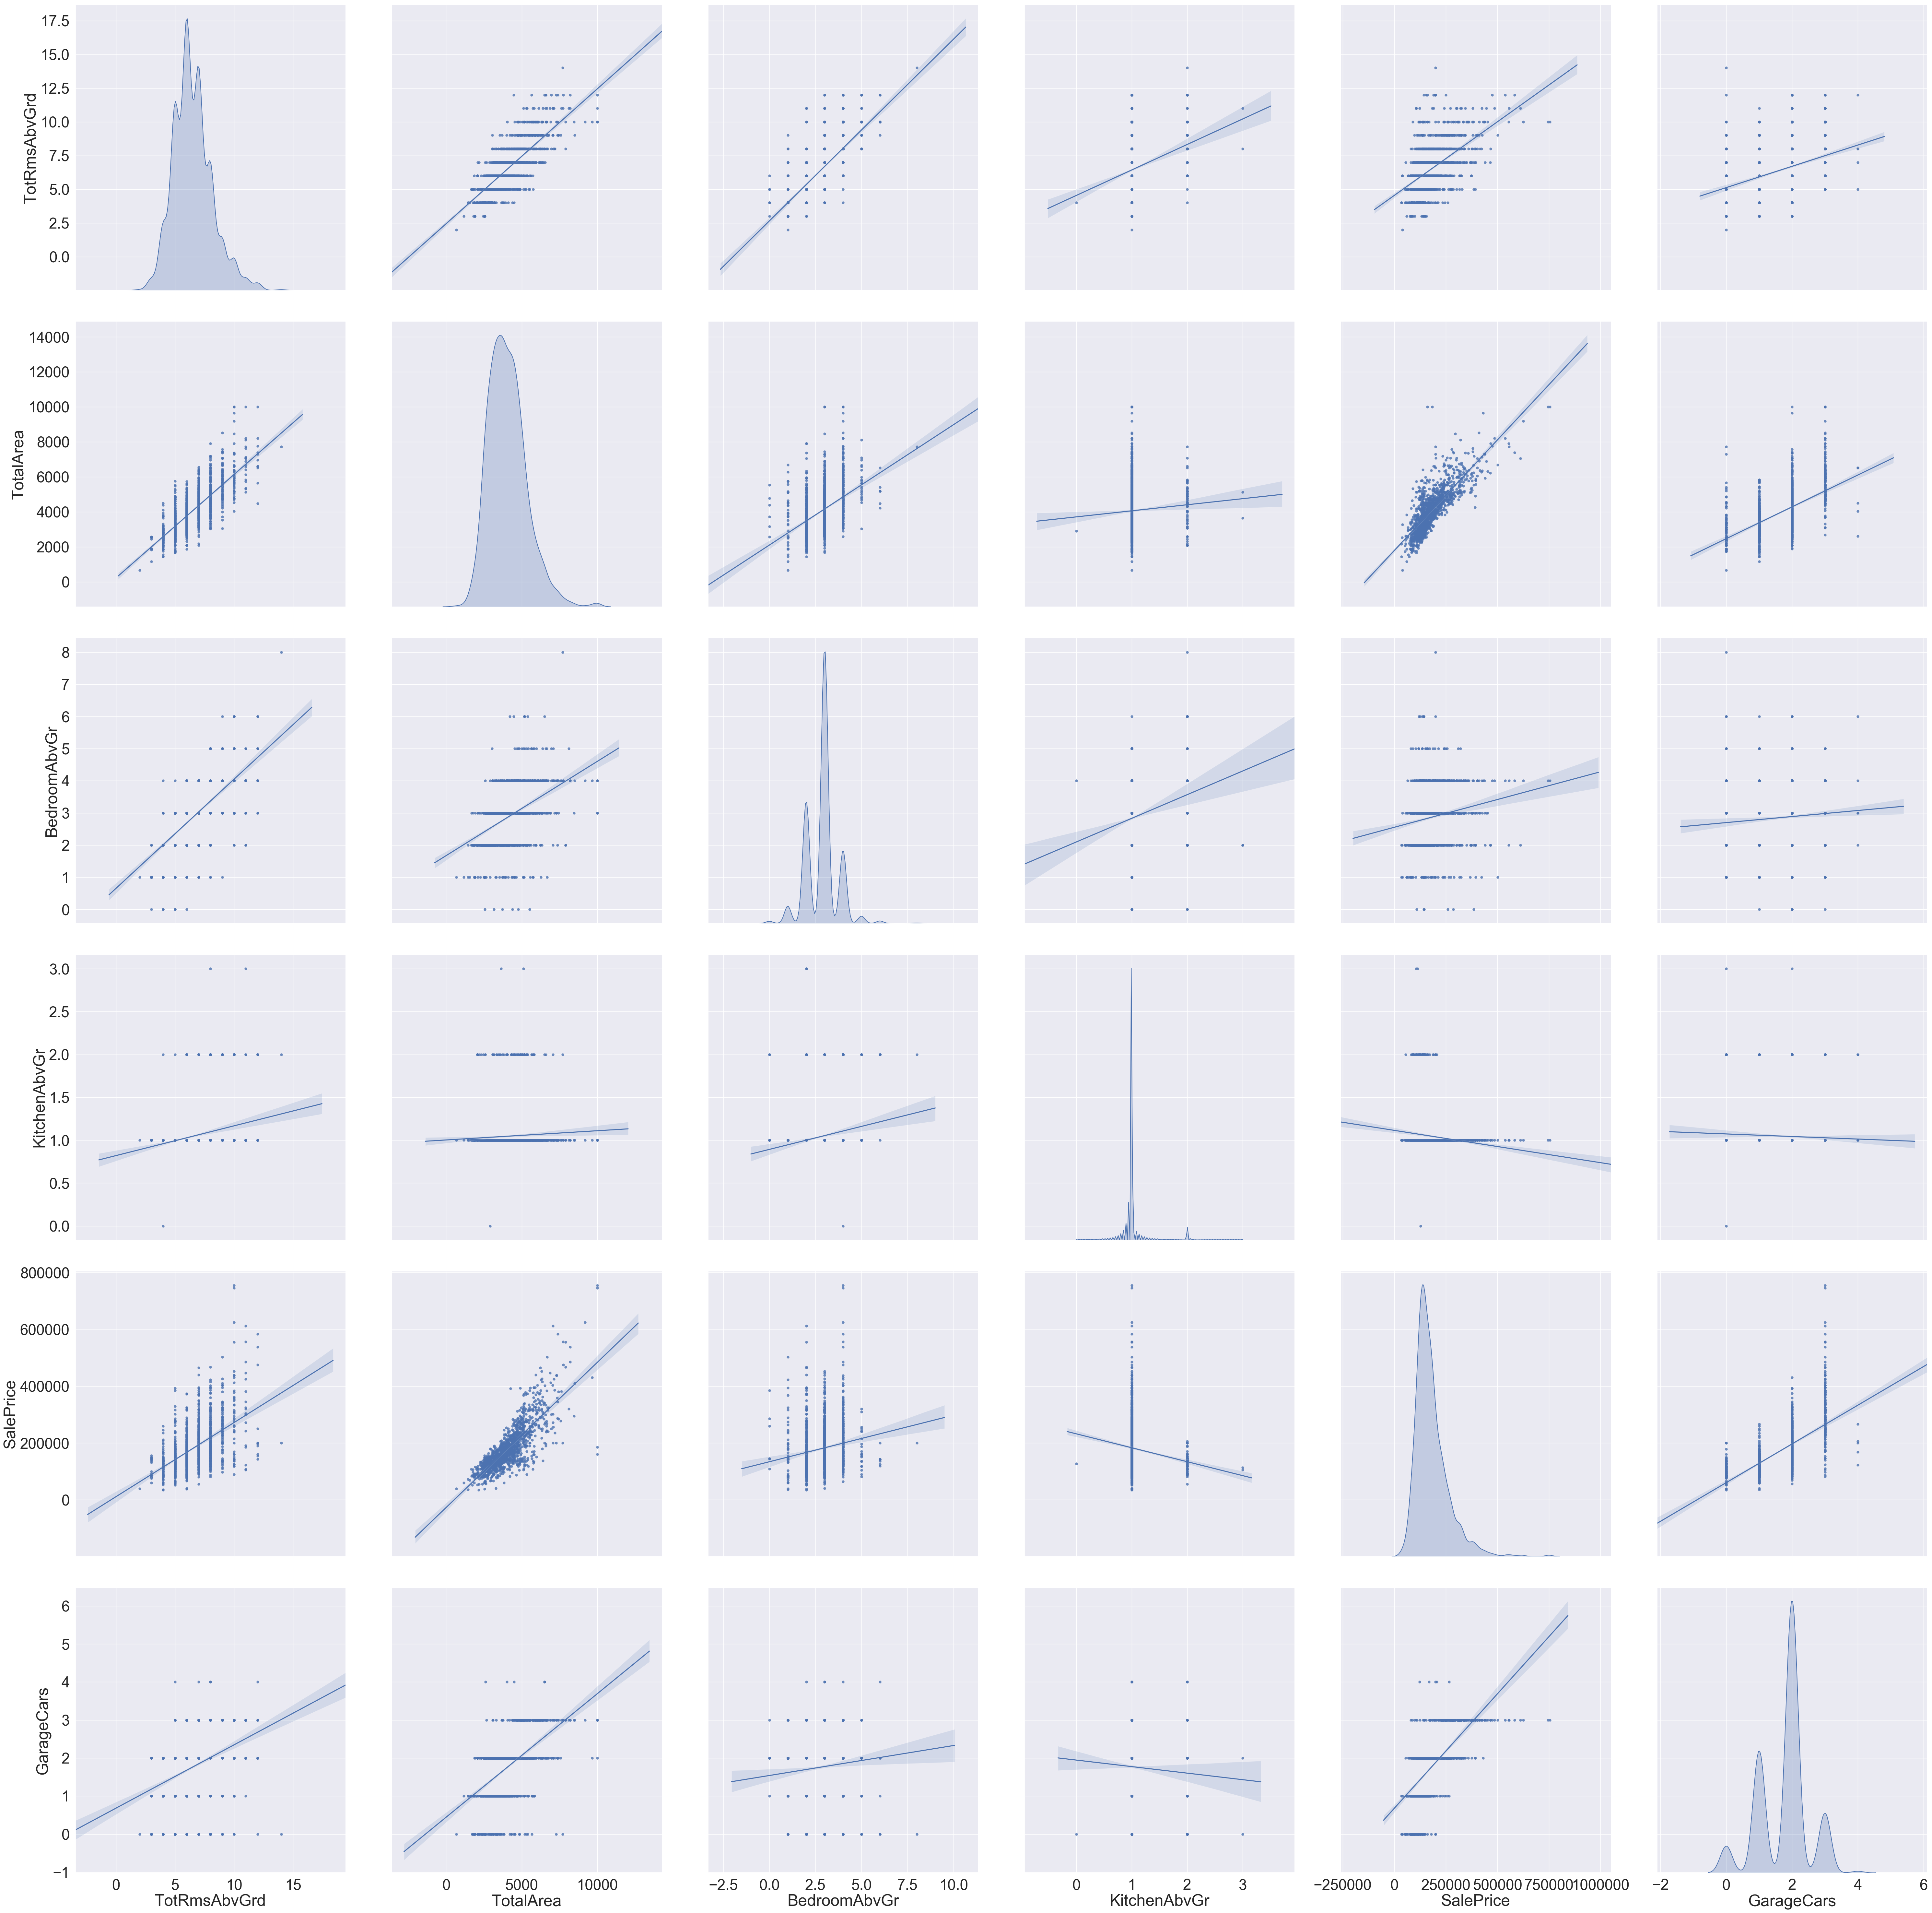

In [253]:
sns.set(font_scale=3)
pairplot_vars = [ 'CentralAir', 'Functional', 'Foundation', 'TotRmsAbvGrd', 'TotalArea', 'BedroomAbvGr', 'KitchenAbvGr','SalePrice','GarageCars']

# Running the pairplot
pairplot1 = sns.pairplot(
    data=df[pairplot_vars], 
    diag_kind='kde',
    kind="reg",
    size=10
)

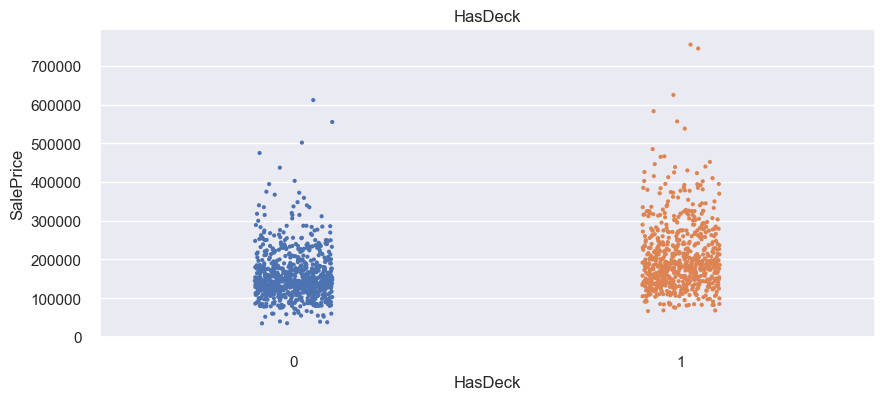

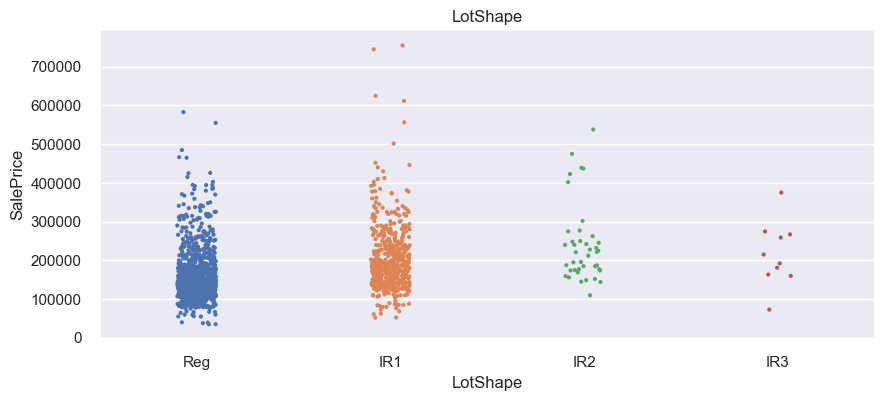

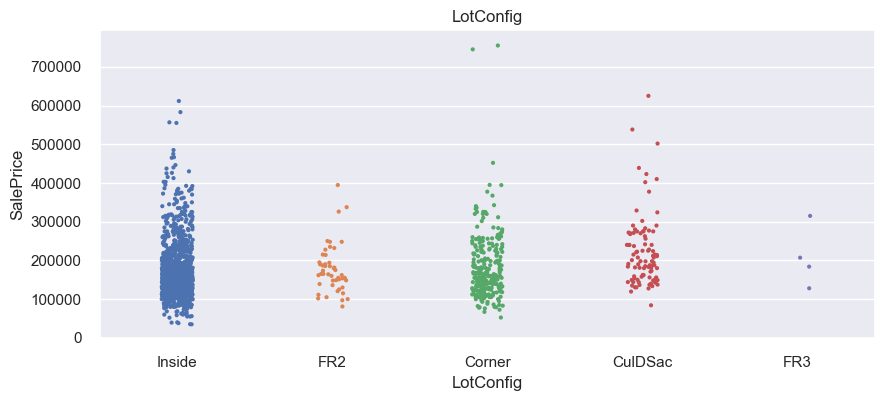

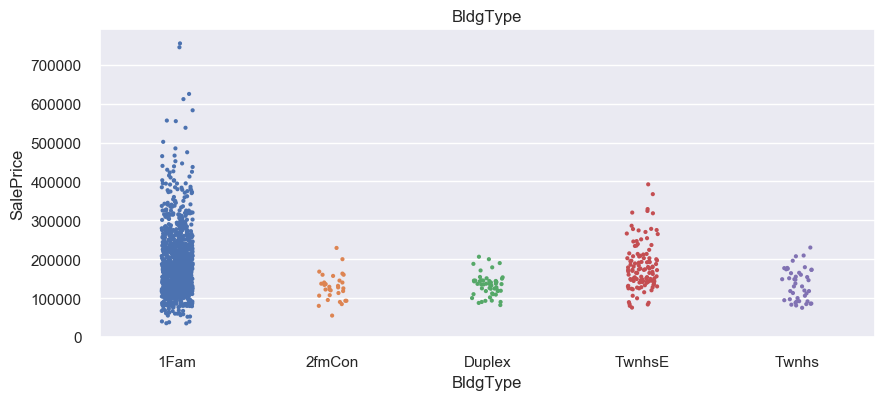

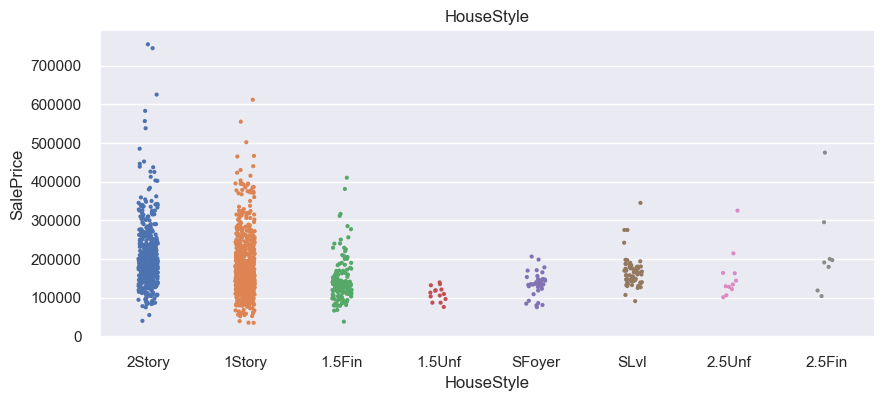

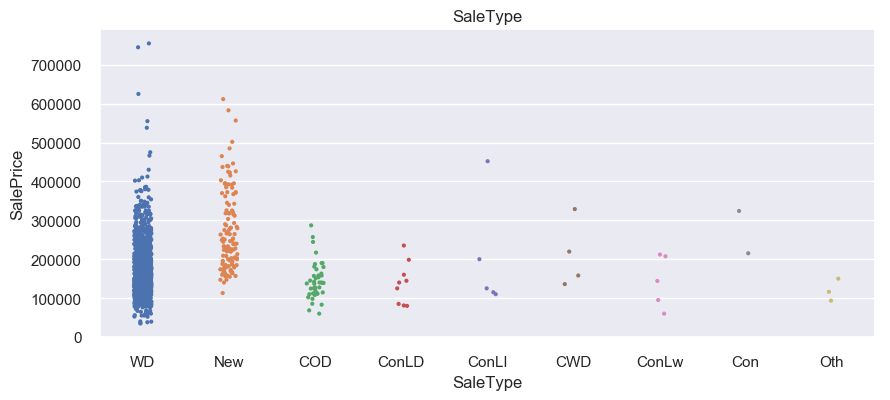

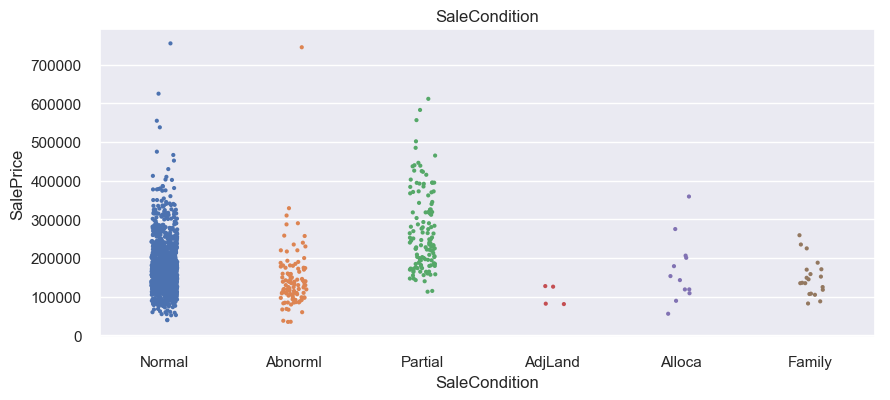

In [254]:
sns.set(font_scale=1)
plot_vars = ['HasDeck', 'LotShape', 'LotConfig', 'BldgType', 'HouseStyle','SaleType', 'SaleCondition' ]

for plot_var in plot_vars:
    plt.figure(figsize=(10,4))
    g = sns.stripplot(
        x=plot_var, 
        y='SalePrice', 
        data=df, 
        size=3,
        alpha=1,
        palette='deep',
        jitter=True
    )
    plt.title(plot_var)

In [255]:
keep_vars = [
    'OverallQual', 'TotalArea', 'GarageCars', 'PropertyAge', 'MSSubClass', 'MSZoning','Neighborhood', 
    'HasPorch', 'HasDeck', 'LotConfig', 'HouseStyle', 'SaleType', 'SaleCondition', 'SalePrice' 
df[keep_vars].to_csv(outfile, index=False)